In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the datasets
trade_deficit = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Economics/Trade Deficit.csv')  # Trade Deficit Data
gdp_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Economics/GDP.csv')            # GDP Data
inflation_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Economics/Inflation.csv') # Inflation Data
foreign_reserves = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Economics/Foreign Reserves.csv') # Foreign Reserves Data
exchange_rate = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Economics/RBI Historical Exchange Rate Data.csv', encoding='latin-1')  # Exchange Rate Data

In [5]:
# Convert 'Year' column to datetime for consistency
for df in [trade_deficit, gdp_data, inflation_data, foreign_reserves, exchange_rate]:
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [11]:
# Add the "deficit" column with computed values
trade_deficit['Deficit'] = trade_deficit[' GDP (Billions of US $)'] / trade_deficit[' Per Capita (US $)']
# Calculate the GDP Growth as the percentage change in GDP
gdp_data['GDP Growth'] = gdp_data['GDP'].pct_change() * 100

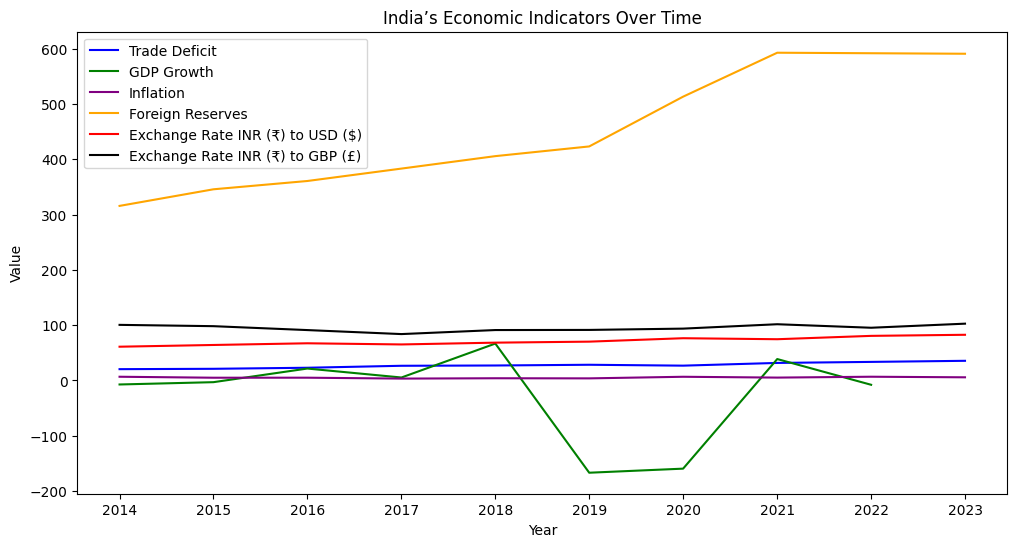

In [27]:
# Plot Trends
plt.figure(figsize=(12, 6))
plt.plot(trade_deficit['Year'], trade_deficit['Deficit'], label='Trade Deficit', color = 'blue')
plt.plot(gdp_data['Year'], gdp_data['GDP Growth'], label='GDP Growth', color = 'green')
plt.plot(inflation_data['Year'], inflation_data['Inflation'], label='Inflation', color = 'purple')
plt.plot(foreign_reserves['Year'], foreign_reserves['Actual Average (Billion $)'], label='Foreign Reserves', color = 'orange')
plt.plot(exchange_rate['Year'], exchange_rate['USD ($)'], label='Exchange Rate INR (₹) to USD ($)', color = 'red')
plt.plot(exchange_rate['Year'], exchange_rate['GBP (£)'], label='Exchange Rate INR (₹) to GBP (£)', color = 'black')
plt.legend()
plt.title('India’s Economic Indicators Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [28]:
# Correlation Analysis
merged_data = trade_deficit.merge(gdp_data, on='Year').merge(
    inflation_data, on='Year').merge(
    foreign_reserves, on='Year').merge(
    exchange_rate, on='Year')
correlation_matrix = merged_data.corr()

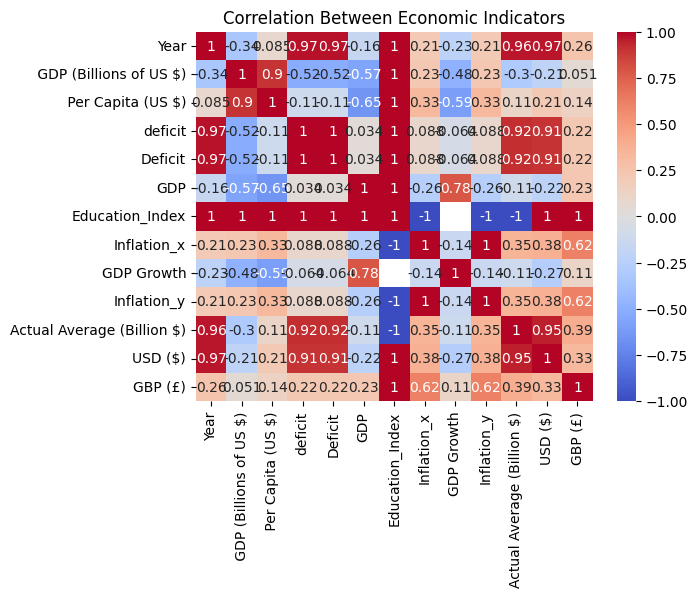

In [29]:
# Heatmap for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Economic Indicators')
plt.show()

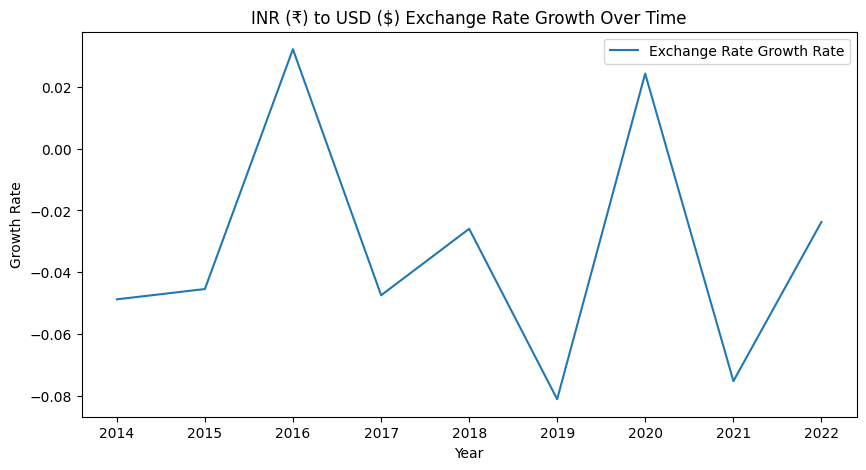

In [22]:
# Analysis of exchange rate trends
exchange_rate_trend = exchange_rate['USD ($)'].pct_change()
plt.figure(figsize=(10, 5))
plt.plot(exchange_rate['Year'], exchange_rate_trend, label='Exchange Rate Growth Rate')
plt.legend()
plt.title('INR (₹) to USD ($) Exchange Rate Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.show()

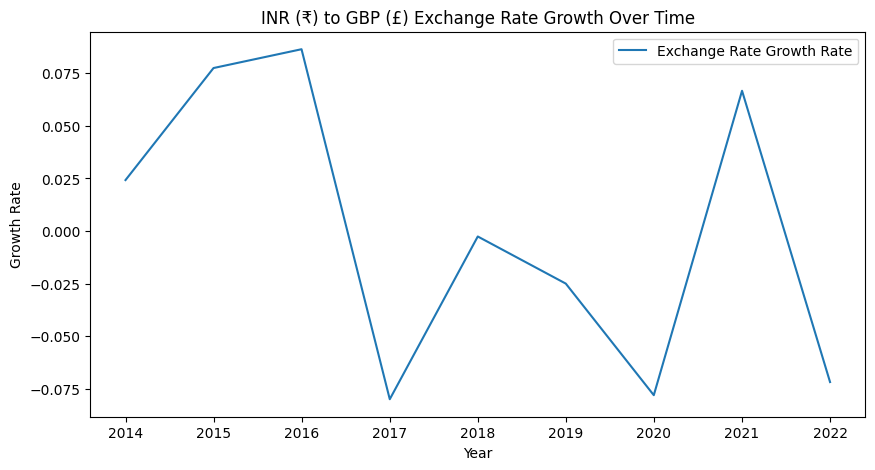

In [23]:
# Analysis of exchange rate trends
exchange_rate_trend = exchange_rate['GBP (£)'].pct_change()
plt.figure(figsize=(10, 5))
plt.plot(exchange_rate['Year'], exchange_rate_trend, label='Exchange Rate Growth Rate')
plt.legend()
plt.title('INR (₹) to GBP (£) Exchange Rate Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.show()